<a href="https://colab.research.google.com/github/MalihehGaroosiha/Barnet-Credit-Audit/blob/main/Barnet_Credit_Audit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🕵️ Auditing Corporate Credit Card Spending for the London Borough of Barnet

**Author:** Maliheh Garoosiha  
**Date:** May 26, 2025  
**Role:** Data Analyst  
**Project Type:** Anomaly Detection & Spending Pattern Analysis  
**Tools Used:** Python (Pandas, Seaborn, Matplotlib), SQL, Power BI

---

## 🎯 Business Scenario

An Auditor for the **London Borough of Barnet** wants to reduce the time it takes to identify suspicious corporate credit card transactions. This project aims to streamline the auditing process by analyzing historical data across different Service Areas to detect unusual spending patterns.

---

## 📌 Project Goal

To consolidate and analyze multiple datasets of transaction records, identify key spending trends and anomalies, and assist the Auditor in quickly targeting high-risk transactions.

---

## 🧰 Datasets Used

- Publicly available corporate credit card data from the **London Borough of Barnet**
- Key fields: `Journal Date`, `Service Area`, `Account Description`, `Creditor`, `Transaction Amounts`


In [ ]:
import pandas as pd
import random
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
%matplotlib inline
import seaborn as sns

## 📊 1. Dataset Overview

This section explores the structure and key components of the dataset before cleaning.


In [ ]:
df1=pd.read_csv("Purchasing Card Data 2014.csv")

In [ ]:
df1.head(3)

,Service Area,Account Description,Creditor,Transaction Date,Journal Reference,Total
0,Childrens Services,IT Services,123-REG.CO.UK,2014-04-23,93,143.81
1,Childrens Services,Other Services,ACCESS EXPEDITIONS,2014-04-03,111,6000.00
2,Childrens Services,Equipment and Materials Repair,AFE SERVICELINE,2014-04-02,6,309.38


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4562 entries, 0 to 4561
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Service Area         4562 non-null   object
 1   Account Description  4562 non-null   object
 2   Creditor             4562 non-null   object
 3   Transaction Date     4562 non-null   object
 4   JV Reference         4562 non-null   int64 
 5   JV Date              4562 non-null   object
 6   JV Value             4562 non-null   object
dtypes: int64(1), object(6)
memory usage: 249.6+ KB


## 🧹 2. Data Cleaning Process

We'll remove duplicate and canceling entries (e.g., negative-positive pair transactions), fix missing values, and ensure consistency.


In [ ]:
df1.shape

(4562, 7)

In [ ]:
df1.head(3)

,Service Area,Account Description,Creditor,Transaction Date,Journal Reference,Total
0,Childrens Services,IT Services,123-REG.CO.UK,2014-04-23,93,143.81
1,Childrens Services,Other Services,ACCESS EXPEDITIONS,2014-04-03,111,6000.00
2,Childrens Services,Equipment and Materials Repair,AFE SERVICELINE,2014-04-02,6,309.38


In [ ]:
df1['Transaction Date'] = df1['Transaction Date'].astype(str)
df1['Transaction Date'] = pd.to_datetime(df1['Transaction Date'], format="%d/%m/%Y", dayfirst=True, errors='coerce')

In [ ]:
df1['JV Value'] = df1['JV Value'].replace({',': ''}, regex=True).astype(float)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4562 entries, 0 to 4561
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Service Area         4562 non-null   object        
 1   Account Description  4562 non-null   object        
 2   Creditor             4562 non-null   object        
 3   Transaction Date     4562 non-null   datetime64[ns]
 4   JV Reference         4562 non-null   int64         
 5   JV Date              4562 non-null   object        
 6   JV Value             4562 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 249.6+ KB


In [ ]:
df2=pd.read_csv("PCard Transactions 15-16.csv")

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Service Area         3864 non-null   object 
 1   Account Description  3864 non-null   object 
 2   Creditor             3864 non-null   object 
 3   Journal Date         3864 non-null   object 
 4   Journal Reference    3864 non-null   float64
 5   Total                3865 non-null   object 
dtypes: float64(1), object(5)
memory usage: 181.3+ KB


In [ ]:
df2.shape

(3865, 6)

In [ ]:
df2['Journal Date'] = df2['Journal Date'].astype(str)
df2['Journal Date'] = pd.to_datetime(df2['Journal Date'], format="%d/%m/%Y", dayfirst=True, errors='coerce')

In [ ]:
df2['Total'] = df2['Total'].replace({',': ''}, regex=True).astype(float)

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3865 entries, 0 to 3864
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Service Area         3864 non-null   object        
 1   Account Description  3864 non-null   object        
 2   Creditor             3864 non-null   object        
 3   Journal Date         3864 non-null   datetime64[ns]
 4   Journal Reference    3864 non-null   float64       
 5   Total                3865 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 181.3+ KB


In [ ]:
df3=pd.read_csv("PCard 16-17.csv")

In [ ]:
df3.head(3)

,Service Area,Account Description,Creditor,Transaction Date,Journal Reference,Total
0,Assurance,Travelling Expenses,TICKETOFFICESALE,2016-03-04,7331.0,29.1
1,Assurance,Travelling Expenses,SELFSERVE TICKET,2016-03-07,7342.0,10.0
2,Assurance,Miscellaneous Expenses,BIRMINGHAM CC,2016-04-22,7871.0,69.0


In [ ]:
df3.shape

(3959, 6)

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3959 entries, 0 to 3958
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Service Area         1604 non-null   object 
 1   Account Description  1604 non-null   object 
 2   Creditor             1604 non-null   object 
 3   Journal Date         1604 non-null   object 
 4   Journal Reference    1604 non-null   float64
 5   Total                1604 non-null   float64
dtypes: float64(2), object(4)
memory usage: 185.7+ KB


In [ ]:
df3['Journal Date'] = df3['Journal Date'].astype(str)
df3['Journal Date'] = pd.to_datetime(df3['Journal Date'], format="%d/%m/%Y", dayfirst=True, errors='coerce')

In [ ]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3959 entries, 0 to 3958
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Service Area         1604 non-null   object        
 1   Account Description  1604 non-null   object        
 2   Creditor             1604 non-null   object        
 3   Journal Date         1604 non-null   datetime64[ns]
 4   Journal Reference    1604 non-null   float64       
 5   Total                1604 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 185.7+ KB


**Renaming columns to defult **
Service Area,	Account Description,	Creditor,	Transaction Date,	Journal Reference,	Total

In [ ]:
dataframes = [df1, df2, df3]
rename_dict = {
    'Journal Date': 'Transaction Date',
    'JV Value': 'Total',
    'JV Reference': 'Journal Reference'
}

for df in dataframes:
    df.rename(columns=rename_dict, inplace=True)
for df in dataframes:
    df.drop(columns=['JV Date'], inplace=True, errors='ignore')
merged_df = pd.concat(dataframes, ignore_index=True)

In [ ]:
merged_df.shape

(12386, 6)

In [ ]:
df=merged_df

In [ ]:
df.head(3)

,Service Area,Account Description,Creditor,Transaction Date,Journal Reference,Total
0,Childrens Services,IT Services,123-REG.CO.UK,2014-04-23,93.0,143.81
1,Childrens Services,Other Services,ACCESS EXPEDITIONS,2014-04-03,111.0,6000.00
2,Childrens Services,Equipment and Materials Repair,AFE SERVICELINE,2014-04-02,6.0,309.38
3,Childrens Services,Equipment and Materials Repair,AFE SERVICELINE,2014-04-02,7.0,218.76
4,Childrens Services,Building Repairs & Maintenance,ALLSOP & FRANCIS,2014-04-15,381.0,306.00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12386 entries, 0 to 12385
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Service Area         10030 non-null  object        
 1   Account Description  10030 non-null  object        
 2   Creditor             10030 non-null  object        
 3   Transaction Date     10030 non-null  datetime64[ns]
 4   Journal Reference    10030 non-null  float64       
 5   Total                10031 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 580.7+ KB


In [ ]:
df.shape

(12386, 6)

In [ ]:
duplicates = df[df.duplicated(keep=False)]  # keep=False shows all duplicate rows including first occurrence
# Display the duplicate rows
print("Completely Duplicate Rows:")
print(duplicates)
duplicates.to_csv('duplicates.csv', index=False)

Completely Duplicate Rows:
                         Service Area             Account Description  \
2048                  Family Services  Equipment and Materials Purcha   
2049                  Family Services  Other Transfer Payments to Soc   
2050   Deputy Chief Operating Officer                     IT Services   
2051                        Education  Private Contractors - Third Pa   
2052                        Education  Equipment and Materials Repair   
...                               ...                             ...   
12381                             NaN                             NaN   
12382                             NaN                             NaN   
12383                             NaN                             NaN   
12384                             NaN                             NaN   
12385                             NaN                             NaN   

                  Creditor Transaction Date  Journal Reference   Total  
2048       A  Y LOCKSMI

In [ ]:
df = df.drop_duplicates()
# Display the DataFrame without duplicates
print("DataFrame without duplicate rows:")
print(df)

DataFrame without duplicate rows:
              Service Area             Account Description  \
0       Childrens Services                     IT Services   
1       Childrens Services                  Other Services   
2       Childrens Services  Equipment and Materials Repair   
3       Childrens Services  Equipment and Materials Repair   
4       Childrens Services  Building Repairs & Maintenance   
...                    ...                             ...   
10027        Commissioning                        Training   
10028        Commissioning                        Training   
10029        Commissioning                        Training   
10030  Regional Enterprise                        Training   
10031                  NaN                             NaN   

                    Creditor Transaction Date  Journal Reference    Total  
0              123-REG.CO.UK       2014-04-23               93.0   143.81  
1         ACCESS EXPEDITIONS       2014-04-03              111.0  600

In [ ]:
df.to_csv('merged_data_without_dup.csv', index=False)

## 📈 3. Data Visualizations of Corporate Spending

Below are visualizations to understand distributions and outliers after data cleaning.

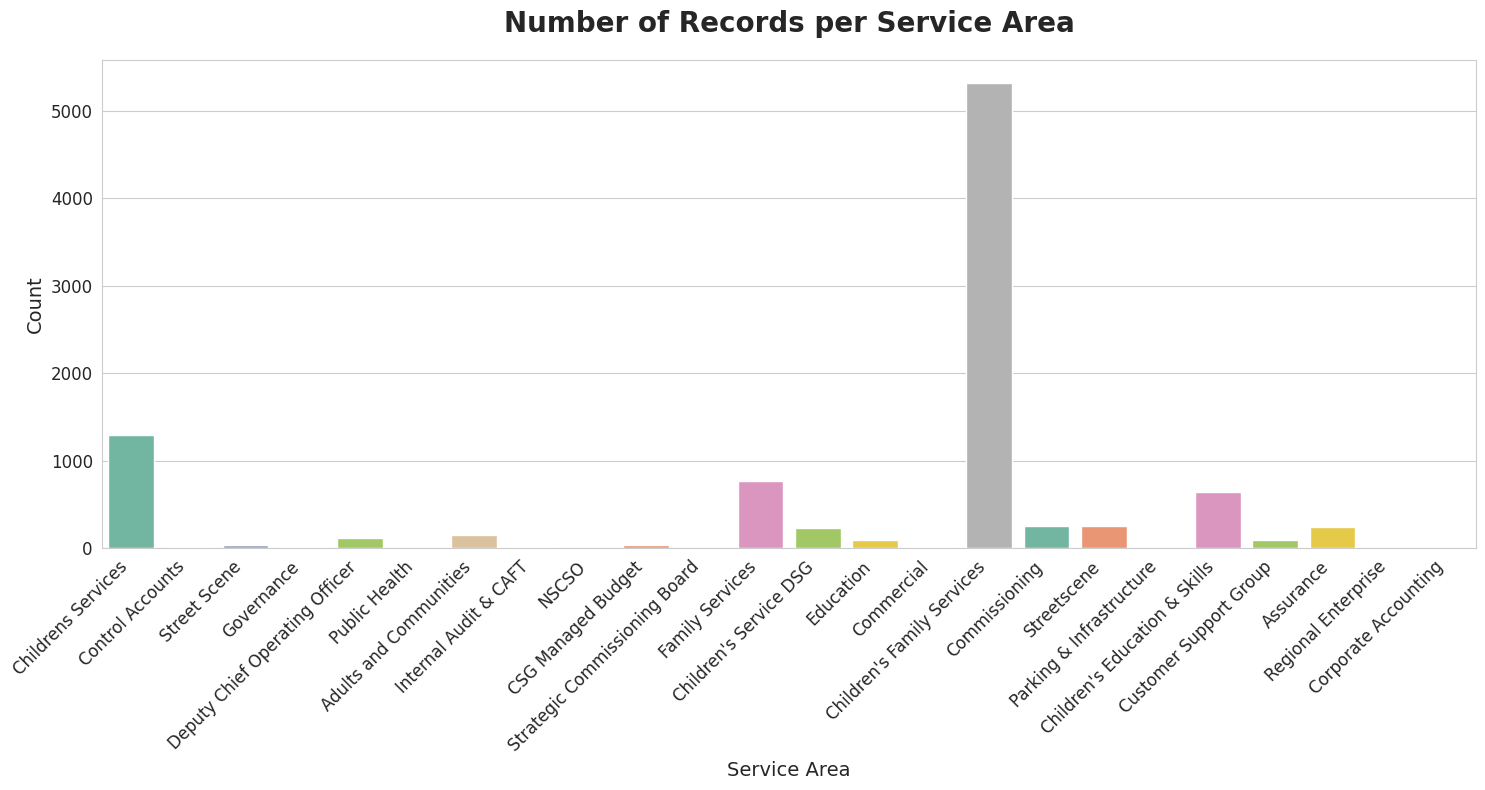

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15, 8))
sns.set_style('whitegrid')
# Create the plot and store it in a variable to modify it later if needed
ax = sns.countplot(x='Service Area', data=df, palette='Set2')
# Rotate x-axis labels
plt.xticks(rotation=45, ha='right', fontsize=12)
# Add title and axis labels
plt.title('Number of Records per Service Area', fontsize=20, weight='bold', pad=20)
plt.xlabel('Service Area', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


In [ ]:
df['Service Area'].unique()

array(['Childrens Services', 'Control Accounts', 'Street Scene',
       'Governance', 'Deputy Chief Operating Officer', 'Public Health',
       'Adults and Communities', 'Internal Audit & CAFT', 'NSCSO',
       'CSG Managed Budget', 'Strategic Commissioning Board',
       'Family Services', "Children's Service DSG", 'Education',
       'Commercial', "Children's Family Services", 'Commissioning',
       'Streetscene', 'Parking & Infrastructure',
       "Children's Education & Skills", 'Customer Support Group',
       'Assurance', 'Regional Enterprise', 'Corporate Accounting'],
      dtype=object)

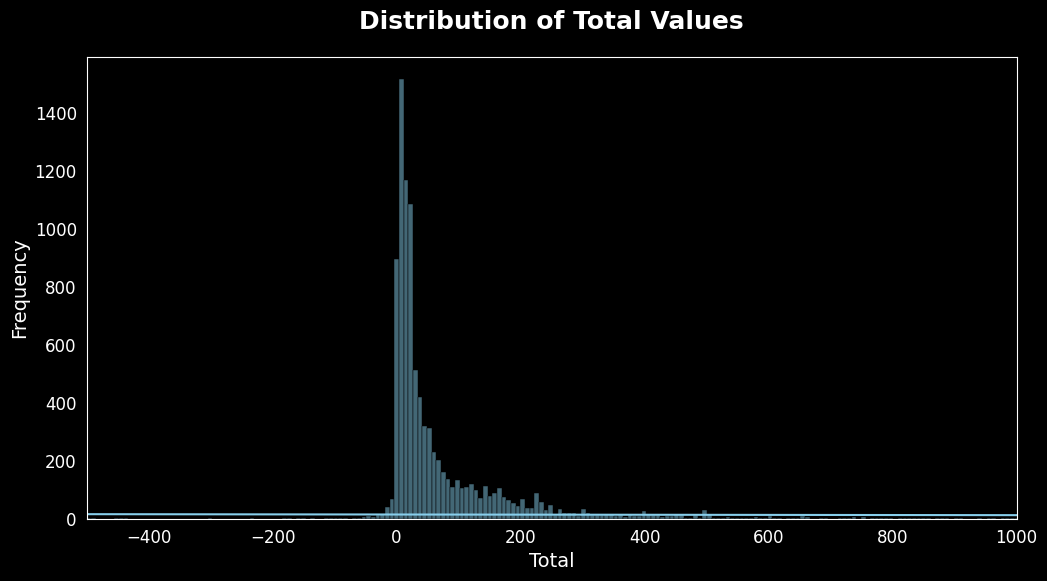

In [ ]:
sns.set_style("dark")
plt.style.use("dark_background")
plt.figure(figsize=(12, 6))
plt.xlim(-500,1000)
sns.histplot(df['Total'],kde=True, color='skyblue',edgecolor='black')
plt.title('Distribution of Total Values', fontsize=18, weight='bold', pad=20)
plt.xlabel('Total', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()


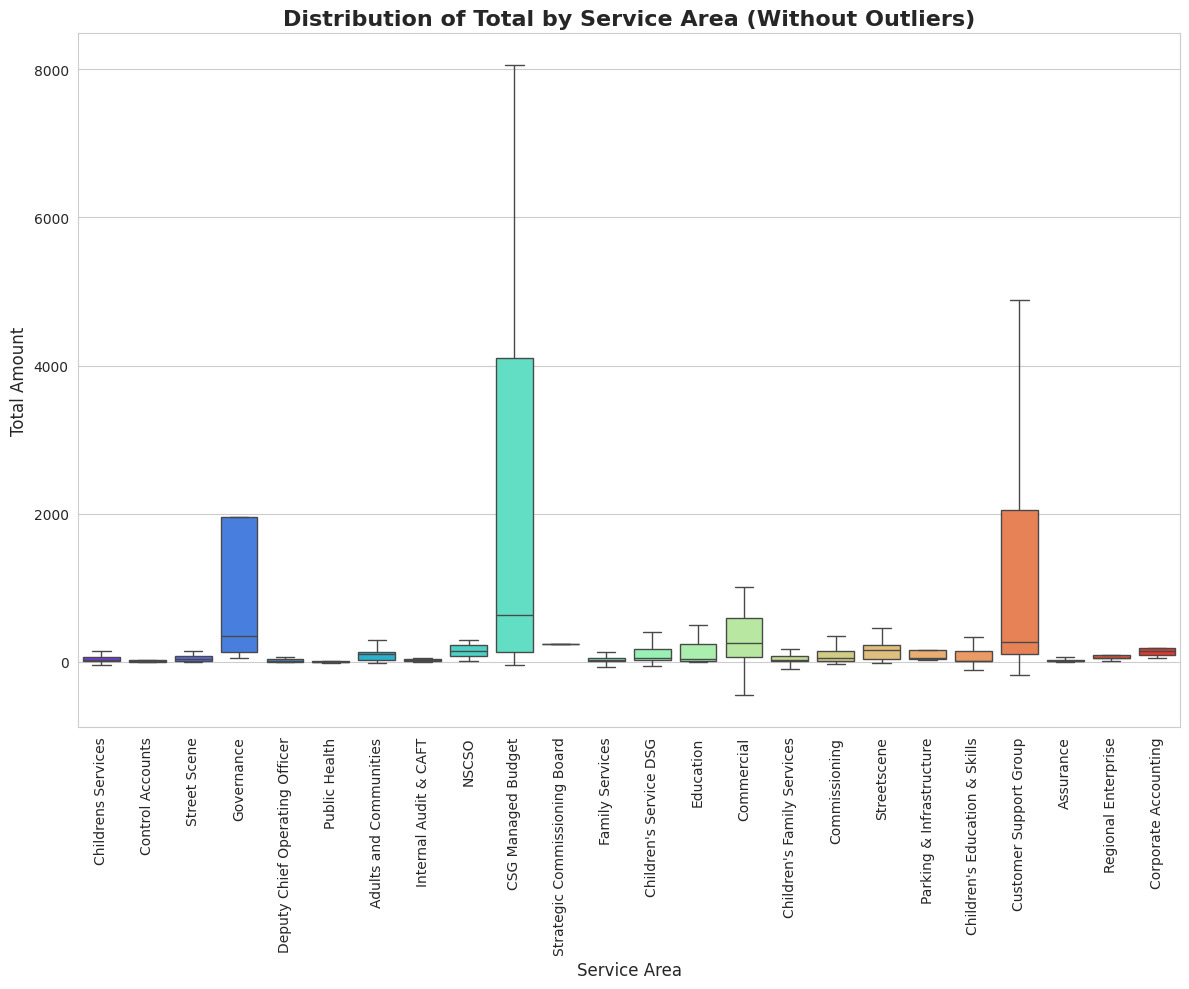

In [ ]:
plt.figure(figsize=(12, 10))
sns.boxplot(x="Service Area", y="Total", data=df, palette='rainbow', showfliers=False)
plt.xticks(rotation=90)
plt.title("Distribution of Total by Service Area (Without Outliers)", fontsize=16, weight='bold')
plt.xlabel("Service Area", fontsize=12)
plt.ylabel("Total Amount", fontsize=12)
plt.tight_layout()
plt.show()


## 🚨 4. Anomaly Detection & Trend Analysis

Using statistical thresholds and visual tools, we detect unusual spending patterns across departments and time periods.


In [ ]:
from scipy import stats

# Perform Shapiro-Wilk test
shapiro_statistic, p_value = stats.shapiro(df["Total"])

print(f"Shapiro-Wilk Statistic: {shapiro_statistic}")
print(f"P-value: {p_value}")

Shapiro-Wilk Statistic: nan
P-value: nan


In [ ]:
# Descriptive Statistics
def descriptive_statistics(df, column):
    print(f"Descriptive statistics for column: {column}")
    print("Mean:", df[column].mean())
    print("Median:", df[column].median())
    print("Mode:", df[column].mode())
    print("Standard Deviation:", df[column].std())
    print("Variance:", df[column].var())
    print("Minimum:", df[column].min())
    print("Maximum:", df[column].max())
    print("Range:", df[column].max() - df[column].min())
    print("25th Percentile:", df[column].quantile(0.25))
    print("50th Percentile (Median):", df[column].quantile(0.50))
    print("75th Percentile:", df[column].quantile(0.75))
    print("Skewness:", df[column].skew())
    print("Kurtosis:", df[column].kurt())
column = "Total"
descriptive_statistics(df, column)

Descriptive statistics for column: Total
Mean: 140.28197273956926
Median: 25.6
Mode: 0    20.0
Name: Total, dtype: float64
Standard Deviation: 3907.1669962191063
Variance: 15265953.936343834
Minimum: -4707.0
Maximum: 381012.77
Range: 385719.77
25th Percentile: 10.0
50th Percentile (Median): 25.6
75th Percentile: 90.0
Skewness: 96.42886036006782
Kurtosis: 9399.007034119466


In [ ]:
summary_stats = df.groupby('Service Area')['Total'].agg(['mean', 'median', 'std', 'min', 'max', 'count'])
# Displaying the summary statistics
print(summary_stats)

                                       mean   median          std      min  \
Service Area                                                                 
Adults and Communities           153.226387  105.000   223.301837   -16.22   
Assurance                         70.462642   12.510   325.407521 -1315.20   
CSG Managed Budget              1971.842778  630.900  2436.480313   -44.99   
Children's Education & Skills     95.407741   19.170   141.041386  -301.35   
Children's Family Services        65.552035   23.430   126.926141  -971.70   
Children's Service DSG           128.391602   60.000   171.468917   -50.69   
Childrens Services                70.626245   23.080   215.164655  -500.00   
Commercial                       304.783333  262.750   437.660009  -450.00   
Commissioning                    161.574419   58.625   370.555280  -780.00   
Control Accounts                  23.838750    8.135    31.462986     3.06   
Corporate Accounting             132.982500  144.990    70.00386

In [ ]:
def find_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Return the values that are outliers
    return data[(data < lower_bound) | (data > upper_bound)]
outliers = df.groupby('Service Area')['Total'].apply(find_outliers).reset_index()
# Drop rows where there are no outliers
outliers = outliers.dropna()
print(outliers)
# Display the outliers for each service area
#import ace_tools as tools;
#tools.display_dataframe_to_user(name="Outliers by Service Area", dataframe=outliers)

                Service Area  level_1   Total
0     Adults and Communities      214  815.50
1     Adults and Communities      215  815.50
2     Adults and Communities      307  400.00
3     Adults and Communities      524  411.00
4     Adults and Communities      877  354.00
...                      ...      ...     ...
1007             Streetscene     9562  583.12
1008             Streetscene     9566  652.50
1009             Streetscene     9569  652.50
1010             Streetscene     9573  652.50
1011             Streetscene     9576  652.50

[1012 rows x 3 columns]


There is not missing value here

In [ ]:
df['Account Description'].value_counts()

,count
Account Description,
Equipment and Materials Purcha,2075
Food Costs,1792
Travelling Expenses,923
Other Transfer Payments to Soc,564
Other Services,538
...,...
Counsels Fees,1
Fixtures and fittings,1
Gas,1


In [ ]:
df['Account Description'].value_counts().idxmax()

'Equipment and Materials Purcha'

In [ ]:
df['Account Description'].value_counts().max()

2075

In [ ]:
df['Account Description'].value_counts().idxmin()

'Operating Leases - Transport'

In [ ]:
df['Account Description'].value_counts().min()

1

In [ ]:
expenses=df[df['Total'] > 0]
Total_expenses= expenses['Total'].sum()
print(Total_expenses)

1367200.81


###Refund Analysis

In [ ]:
refunds =df[df['Total']<0]
print(refunds)

                    Service Area     Account Description  \
22            Childrens Services              Food Costs   
119           Childrens Services  Miscellaneous Expenses   
164           Childrens Services              Food Costs   
269           Childrens Services              Food Costs   
282           Childrens Services              Food Costs   
...                          ...                     ...   
9778  Children's Family Services              Food Costs   
9873      Customer Support Group          Equipment Hire   
9874      Customer Support Group          Equipment Hire   
9916  Children's Family Services              Food Costs   
9949  Children's Family Services              Food Costs   

                              Creditor Transaction Date  Journal Reference  \
22                  ASDA HOME DELIVERY       2014-04-15               50.0   
119                GRO HM PASSPORT OFF       2014-04-16              279.0   
164                  JS ONLINE GROCERY       

In [ ]:
refunds_by_service = refunds.groupby('Service Area')['Total'].sum()
print(refunds_by_service)

Service Area
Adults and Communities            -16.22
Assurance                       -1365.19
CSG Managed Budget                -44.99
Children's Education & Skills    -930.44
Children's Family Services      -6873.29
Children's Service DSG            -96.96
Childrens Services              -1794.09
Commercial                       -450.00
Commissioning                   -1049.80
Customer Support Group          -5159.80
Family Services                  -616.54
Public Health                     -13.30
Streetscene                      -540.15
Name: Total, dtype: float64


In [ ]:
refunds_by_account = refunds.groupby('Account Description')['Total'].sum()
print(refunds_by_account)

Account Description
Books-CDs-Audio-Video             -144.68
Building Repairs & Maintenance    -583.28
Cleaning and domestic material     -49.86
Conference Expenses               -178.80
Consumable Catering Supplies       -66.55
E25 - Catering Supplies             -1.05
Education CFR Administrative S     -65.83
Equipment Hire                    -274.00
Equipment and Materials Purcha   -4352.37
Fixtures and fittings            -1315.20
Food Costs                       -1192.44
Hardware Purchases                  -6.00
IT Services                        -19.40
Legal and Court Fees             -4903.45
Miscellaneous Expenses            -400.48
Other Services                    -997.62
Other Transfer Payments to Soc    -597.66
Other Vehicle Costs                -49.99
Private Contractors - Third Pa   -1198.11
Professional Services             -780.00
Stationery                       -1129.18
Training                           -16.22
Travelling Expenses               -128.60
Vehicle Runnin

In [ ]:
refunds_by_Creditor = refunds.groupby('Creditor')['Total'].sum()
print(refunds_by_Creditor)

Creditor
 Sainsburys S/mkts        -50.00
AMAZON EU                -835.29
AMAZON PRIME              -65.83
AMAZON UK MARKETPLACE    -299.36
AO RETAIL LIMITED         -30.00
                           ...  
WWW.DOORCONTROLSDIR       -88.14
WWW.EUREKADIRECT.CO.UK    -13.20
WWW.FLEETMINICABS.C       -69.25
WWW.JOHNLEWIS.COM        -101.00
WWW.QVCUK.COM             -27.95
Name: Total, Length: 93, dtype: float64


In [ ]:
refunds=df[df['Total'] < 0]
Total_refunds= refunds['Total'].sum()
print(Total_refunds)

-18950.77


In [ ]:
refunds.shape

(283, 6)

##Identifying and Eliminating Linked Negative-Positive Transaction Pairs

In [ ]:
df.sort_values(by=['Service Area', 'Account Description', 'Creditor', 'Transaction Date'], inplace=True)

# Create a copy of the dataframe to track rows to drop
df_to_drop = pd.DataFrame()

for index, row in df.iterrows():
    if pd.notnull(row['Total']) and isinstance(row['Total'], (int, float)) and row['Total'] < 0:
        # Find matching rows with the same Service Area, Account Description, Creditor, and Date condition
        matching_rows = df[(df['Service Area'] == row['Service Area']) &
                           (df['Account Description'] == row['Account Description'])
                           &
                           (df['Transaction Date'] <= row['Transaction Date'])]
                          # (df['Creditor'] == row['Creditor'])
        if not matching_rows.empty:
            # Assume the first matching row is the counterpart
            positive_index = matching_rows.index[0]

            # Mark both positive and negative rows to be removed
            df_to_drop = pd.concat([df_to_drop, df.loc[[index, positive_index]]])

# Drop the rows from the original dataset
df_cleaned = df.drop(df_to_drop.index)

# Output the cleaned dataset
print("Cleaned Data:")
print(df_cleaned)

<ipython-input-97-d7190c67058d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by=['Service Area', 'Account Description', 'Creditor', 'Transaction Date'], inplace=True)


Cleaned Data:
                 Service Area    Account Description             Creditor  \
3367   Adults and Communities  Books-CDs-Audio-Video            Amazon EU   
3368   Adults and Communities  Books-CDs-Audio-Video            Amazon EU   
3391   Adults and Communities  Books-CDs-Audio-Video  Amazon Mktplce EU-U   
3742   Adults and Communities  Books-CDs-Audio-Video  Amazon Mktplce EU-U   
3741   Adults and Communities  Books-CDs-Audio-Video  Amazon Mktplce EU-U   
...                       ...                    ...                  ...   
9567              Streetscene  Vehicle Running Costs      WWW.DVLA.GOV.UK   
9569              Streetscene  Vehicle Running Costs      WWW.DVLA.GOV.UK   
4104              Streetscene  Vehicle Running Costs   WWW.METROLINE.CO.U   
8426                      NaN                    NaN                  NaN   
10031                     NaN                    NaN                  NaN   

      Transaction Date  Journal Reference      Total  
3367  

In [ ]:
refund_1=df[df['Total']<0]
print(refund_1)
refund_1.to_csv("refund.csv")

                       Service Area             Account Description  \
4614         Adults and Communities                        Training   
8618                      Assurance           Fixtures and fittings   
8647                      Assurance             Other Vehicle Costs   
843              CSG Managed Budget           Books-CDs-Audio-Video   
3914  Children's Education & Skills    Consumable Catering Supplies   
...                             ...                             ...   
1709                Family Services             Travelling Expenses   
833                   Public Health           Books-CDs-Audio-Video   
4176                    Streetscene           Books-CDs-Audio-Video   
3423                    Streetscene  Building Repairs & Maintenance   
4217                    Streetscene  Equipment and Materials Purcha   

                                 Creditor Transaction Date  Journal Reference  \
4614                            AMAZON EU       2015-08-31        

In [ ]:
df_cleaned.to_csv('cleaned_data_noduplicat_norefund.csv', index=False)

In [ ]:
df=df_cleaned

In [ ]:
df.shape

(9263, 6)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9263 entries, 3367 to 10031
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Service Area         9261 non-null   object        
 1   Account Description  9261 non-null   object        
 2   Creditor             9261 non-null   object        
 3   Transaction Date     9261 non-null   datetime64[ns]
 4   Journal Reference    9261 non-null   float64       
 5   Total                9262 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 506.6+ KB


In [ ]:
df.head(3)

,Service Area,Account Description,Creditor,Transaction Date,Journal Reference,Total,Year,Quarter
0,Childrens Services,IT Services,123-REG.CO.UK,2014-04-23,93.0,143.81,2014.0,2014Q2
1,Childrens Services,Other Services,ACCESS EXPEDITIONS,2014-04-03,111.0,6000.00,2014.0,2014Q2
2,Childrens Services,Equipment and Materials Repair,AFE SERVICELINE,2014-04-02,6.0,309.38,2014.0,2014Q2


In [ ]:
summary_stats = df.groupby('Service Area')['Total'].agg(['mean', 'median', 'std', 'min', 'max', 'count'])

# Displaying the summary statistics
print(summary_stats)

                                       mean   median          std     min  \
Service Area                                                                
Adults and Communities           154.600588  105.000   224.316876    3.29   
Assurance                         76.779177   12.520   314.905001    0.37   
CSG Managed Budget              2088.306765  729.000  2458.574721    4.86   
Children's Education & Skills     98.204543   19.170   140.216984    0.24   
Children's Family Services        69.359722   25.300   125.676430    0.00   
Children's Service DSG           129.537257   60.600   170.533715    1.10   
Childrens Services                73.090294   23.400   216.257972    0.55   
Commercial                       391.864286  262.750   384.816592   15.00   
Commissioning                    166.462869   59.000   368.014127    0.29   
Control Accounts                  23.838750    8.135    31.462986    3.06   
Corporate Accounting             132.982500  144.990    70.003861   50.00   

In [ ]:
refunds_1 =df[df['Total']<0]
print(refunds_1)

Empty DataFrame
Columns: [Service Area, Account Description, Creditor, Transaction Date, Journal Reference, Total]
Index: []


In [ ]:
df.head(3)

,Service Area,Account Description,Creditor,Transaction Date,Journal Reference,Total,Year,Quarter
0,Childrens Services,IT Services,123-REG.CO.UK,2014-04-23,93.0,143.81,2014.0,2014Q2
1,Childrens Services,Other Services,ACCESS EXPEDITIONS,2014-04-03,111.0,6000.00,2014.0,2014Q2
2,Childrens Services,Equipment and Materials Repair,AFE SERVICELINE,2014-04-02,6.0,309.38,2014.0,2014Q2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9263 entries, 3367 to 10031
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Service Area         9261 non-null   object        
 1   Account Description  9261 non-null   object        
 2   Creditor             9261 non-null   object        
 3   Transaction Date     9261 non-null   datetime64[ns]
 4   Journal Reference    9261 non-null   float64       
 5   Total                9262 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 506.6+ KB


## 🧠 5. Clustering Suspicious Transactions

We apply unsupervised learning to group transactions that deviate from the norm and might warrant auditing attention.


In [ ]:
df['Year'] = df['Transaction Date'].dt.year
df['Quarter'] = df['Transaction Date'].dt.to_period('Q')
df.head(3)

,Service Area,Account Description,Creditor,Transaction Date,Journal Reference,Total,Year,Quarter
0,Childrens Services,IT Services,123-REG.CO.UK,2014-04-23,93.0,143.81,2014.0,2014Q2
1,Childrens Services,Other Services,ACCESS EXPEDITIONS,2014-04-03,111.0,6000.00,2014.0,2014Q2
2,Childrens Services,Equipment and Materials Repair,AFE SERVICELINE,2014-04-02,6.0,309.38,2014.0,2014Q2


In [ ]:
summary_df = df.groupby(['Service Area', 'Quarter']).agg(
    transaction_count=('Total', 'size'),
    average_transaction=('Total', 'mean'),
    sum_transaction=('Total', 'sum')
).reset_index()
summary_df.head(3)

,Service Area,Quarter,transaction_count,average_transaction,sum_transaction
0,Adults and Communities,2014Q2,16,288.000000,4608.00
1,Adults and Communities,2014Q3,8,321.306250,2570.45
2,Adults and Communities,2014Q4,18,119.407222,2149.33


In [ ]:
print(summary_df.dtypes)

Service Area                  object
Quarter                period[Q-DEC]
transaction_count              int64
average_transaction          float64
sum_transaction              float64
dtype: object


In [ ]:
service_areas = summary_df['Service Area'].unique()
print(service_areas)

['Adults and Communities' 'Assurance' 'CSG Managed Budget'
 "Children's Education & Skills" "Children's Family Services"
 "Children's Service DSG" 'Childrens Services' 'Commercial'
 'Commissioning' 'Control Accounts' 'Corporate Accounting'
 'Customer Support Group' 'Deputy Chief Operating Officer' 'Education'
 'Family Services' 'Governance' 'Internal Audit & CAFT' 'NSCSO'
 'Parking & Infrastructure' 'Public Health' 'Regional Enterprise'
 'Strategic Commissioning Board' 'Street Scene' 'Streetscene']


In [ ]:
print(f"Number of unique service areas: {len(service_areas)}")

Number of unique service areas: 24


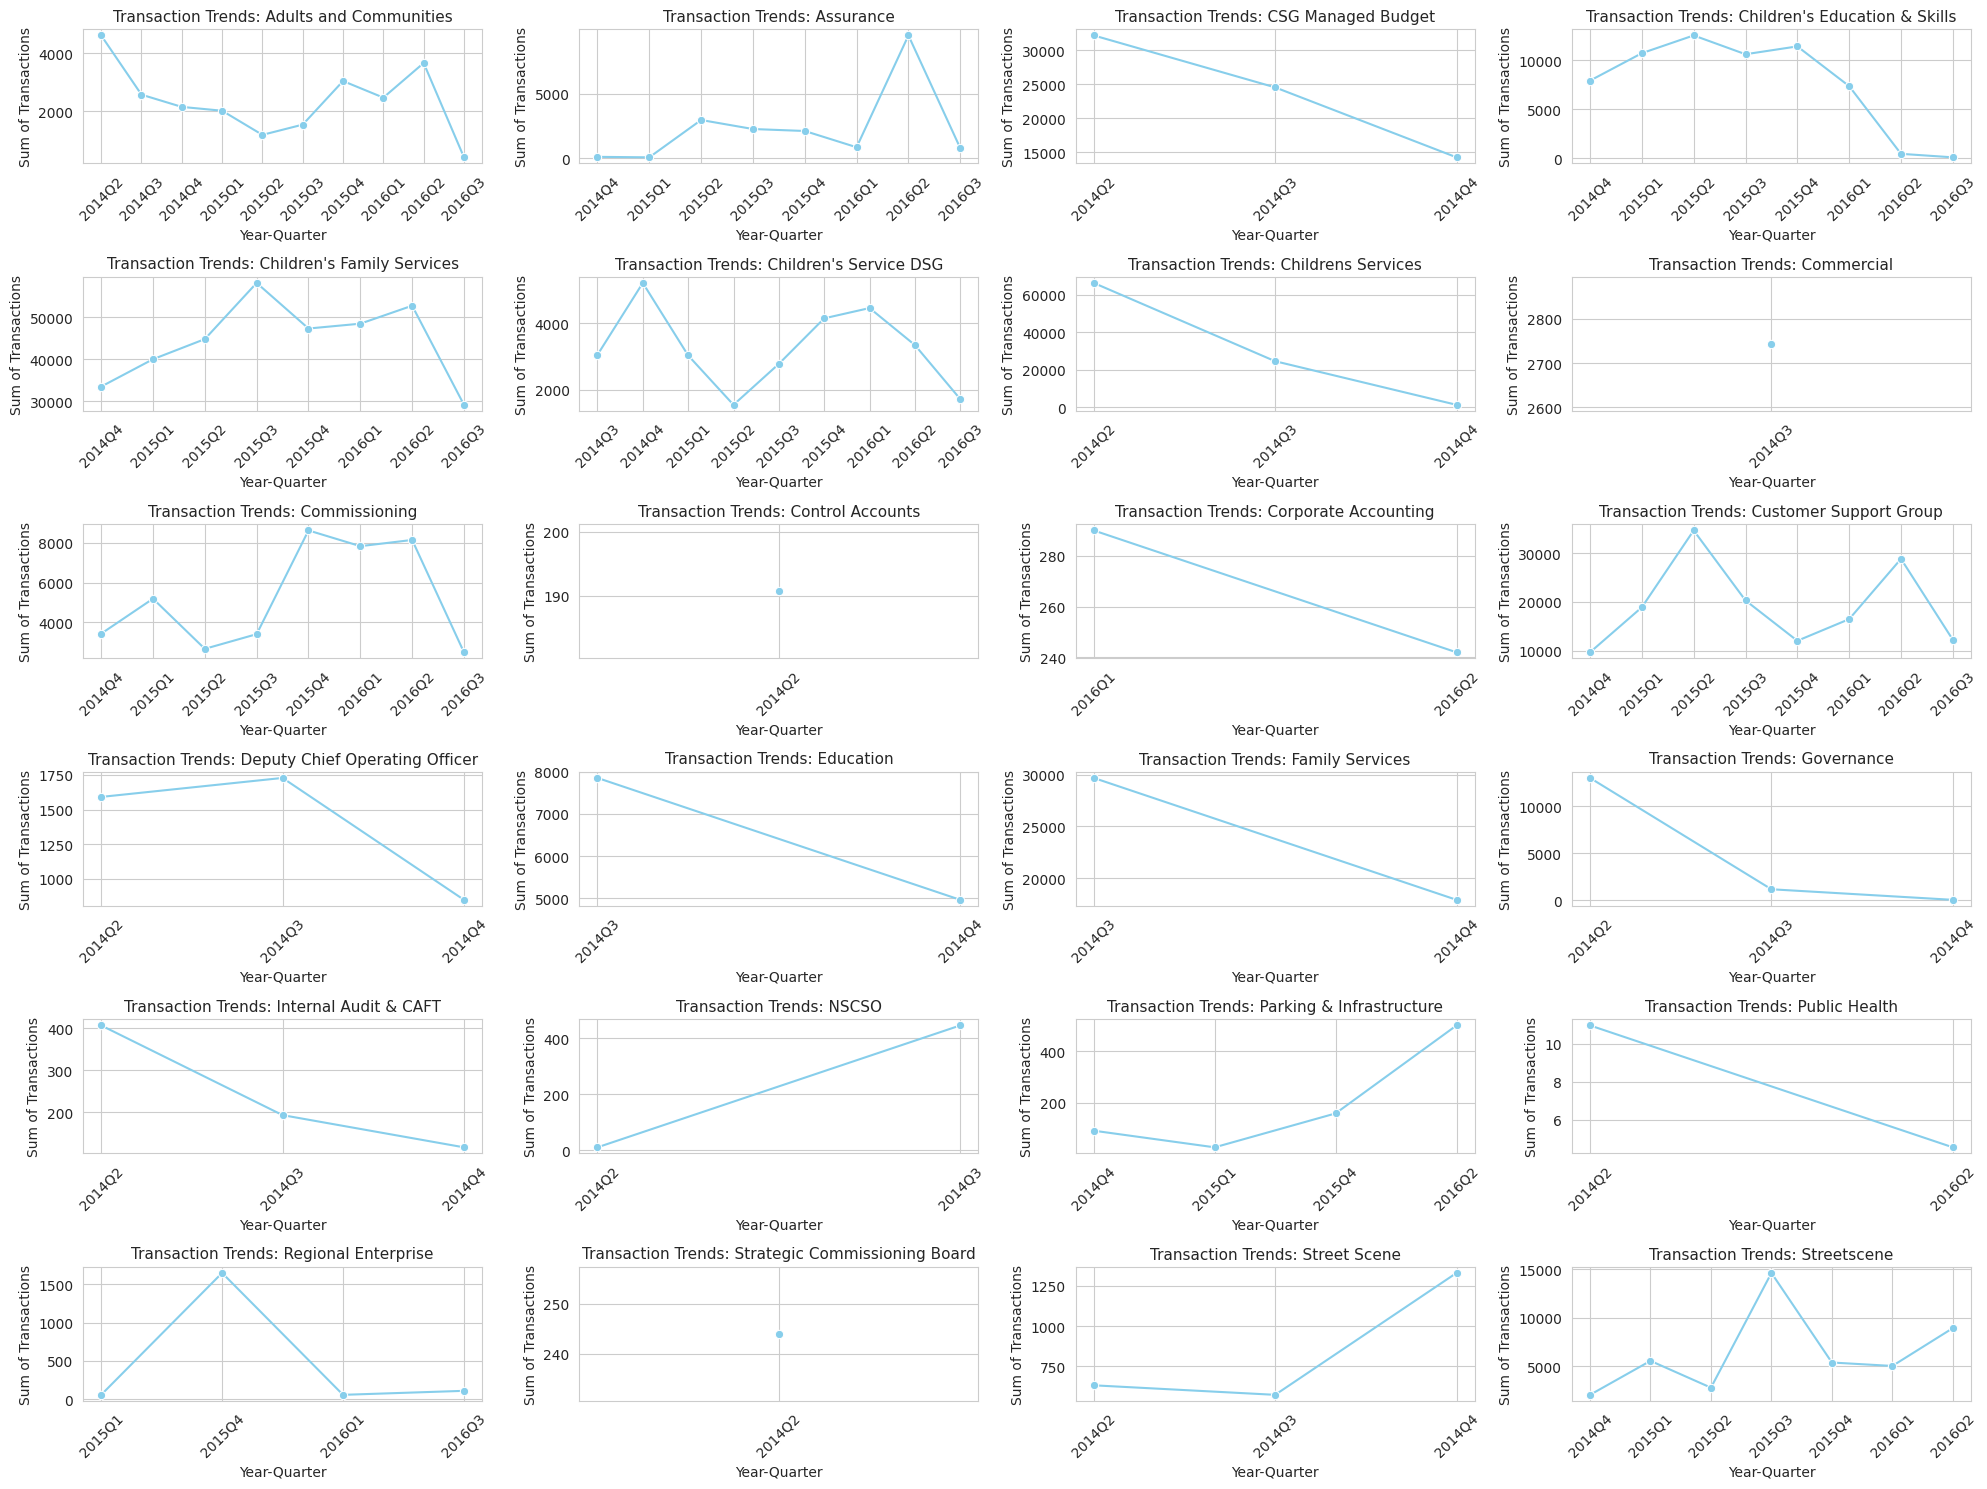

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Suppress ticklabel warnings
warnings.filterwarnings("ignore")
# Convert 'Quarter' to string if needed
summary_df['Quarter_str'] = summary_df['Quarter'].astype(str)
# Get unique service areas
service_areas = summary_df['Service Area'].unique()
# Create subplots
fig, axes = plt.subplots(6, 4, figsize=(20, 15))
axes = axes.flatten()
# Plot each service area's trend
for i, service_area in enumerate(service_areas):
    service_area_data = summary_df[summary_df['Service Area'] == service_area]
    sns.lineplot(ax=axes[i], x='Quarter_str', y='sum_transaction', data=service_area_data, marker="o", color='skyblue')
    # Clean, safe label rotation
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xlabel('Year-Quarter', fontsize=10)
    axes[i].set_ylabel('Sum of Transactions', fontsize=10)
    axes[i].set_title(f'Transaction Trends: {service_area}', fontsize=11)
# Hide unused subplots if any
for j in range(len(service_areas), len(axes)):
    fig.delaxes(axes[j])
# Improve layout and save
plt.tight_layout()
plt.savefig('Sum_Transaction.png', dpi=300, bbox_inches='tight')
plt.show()


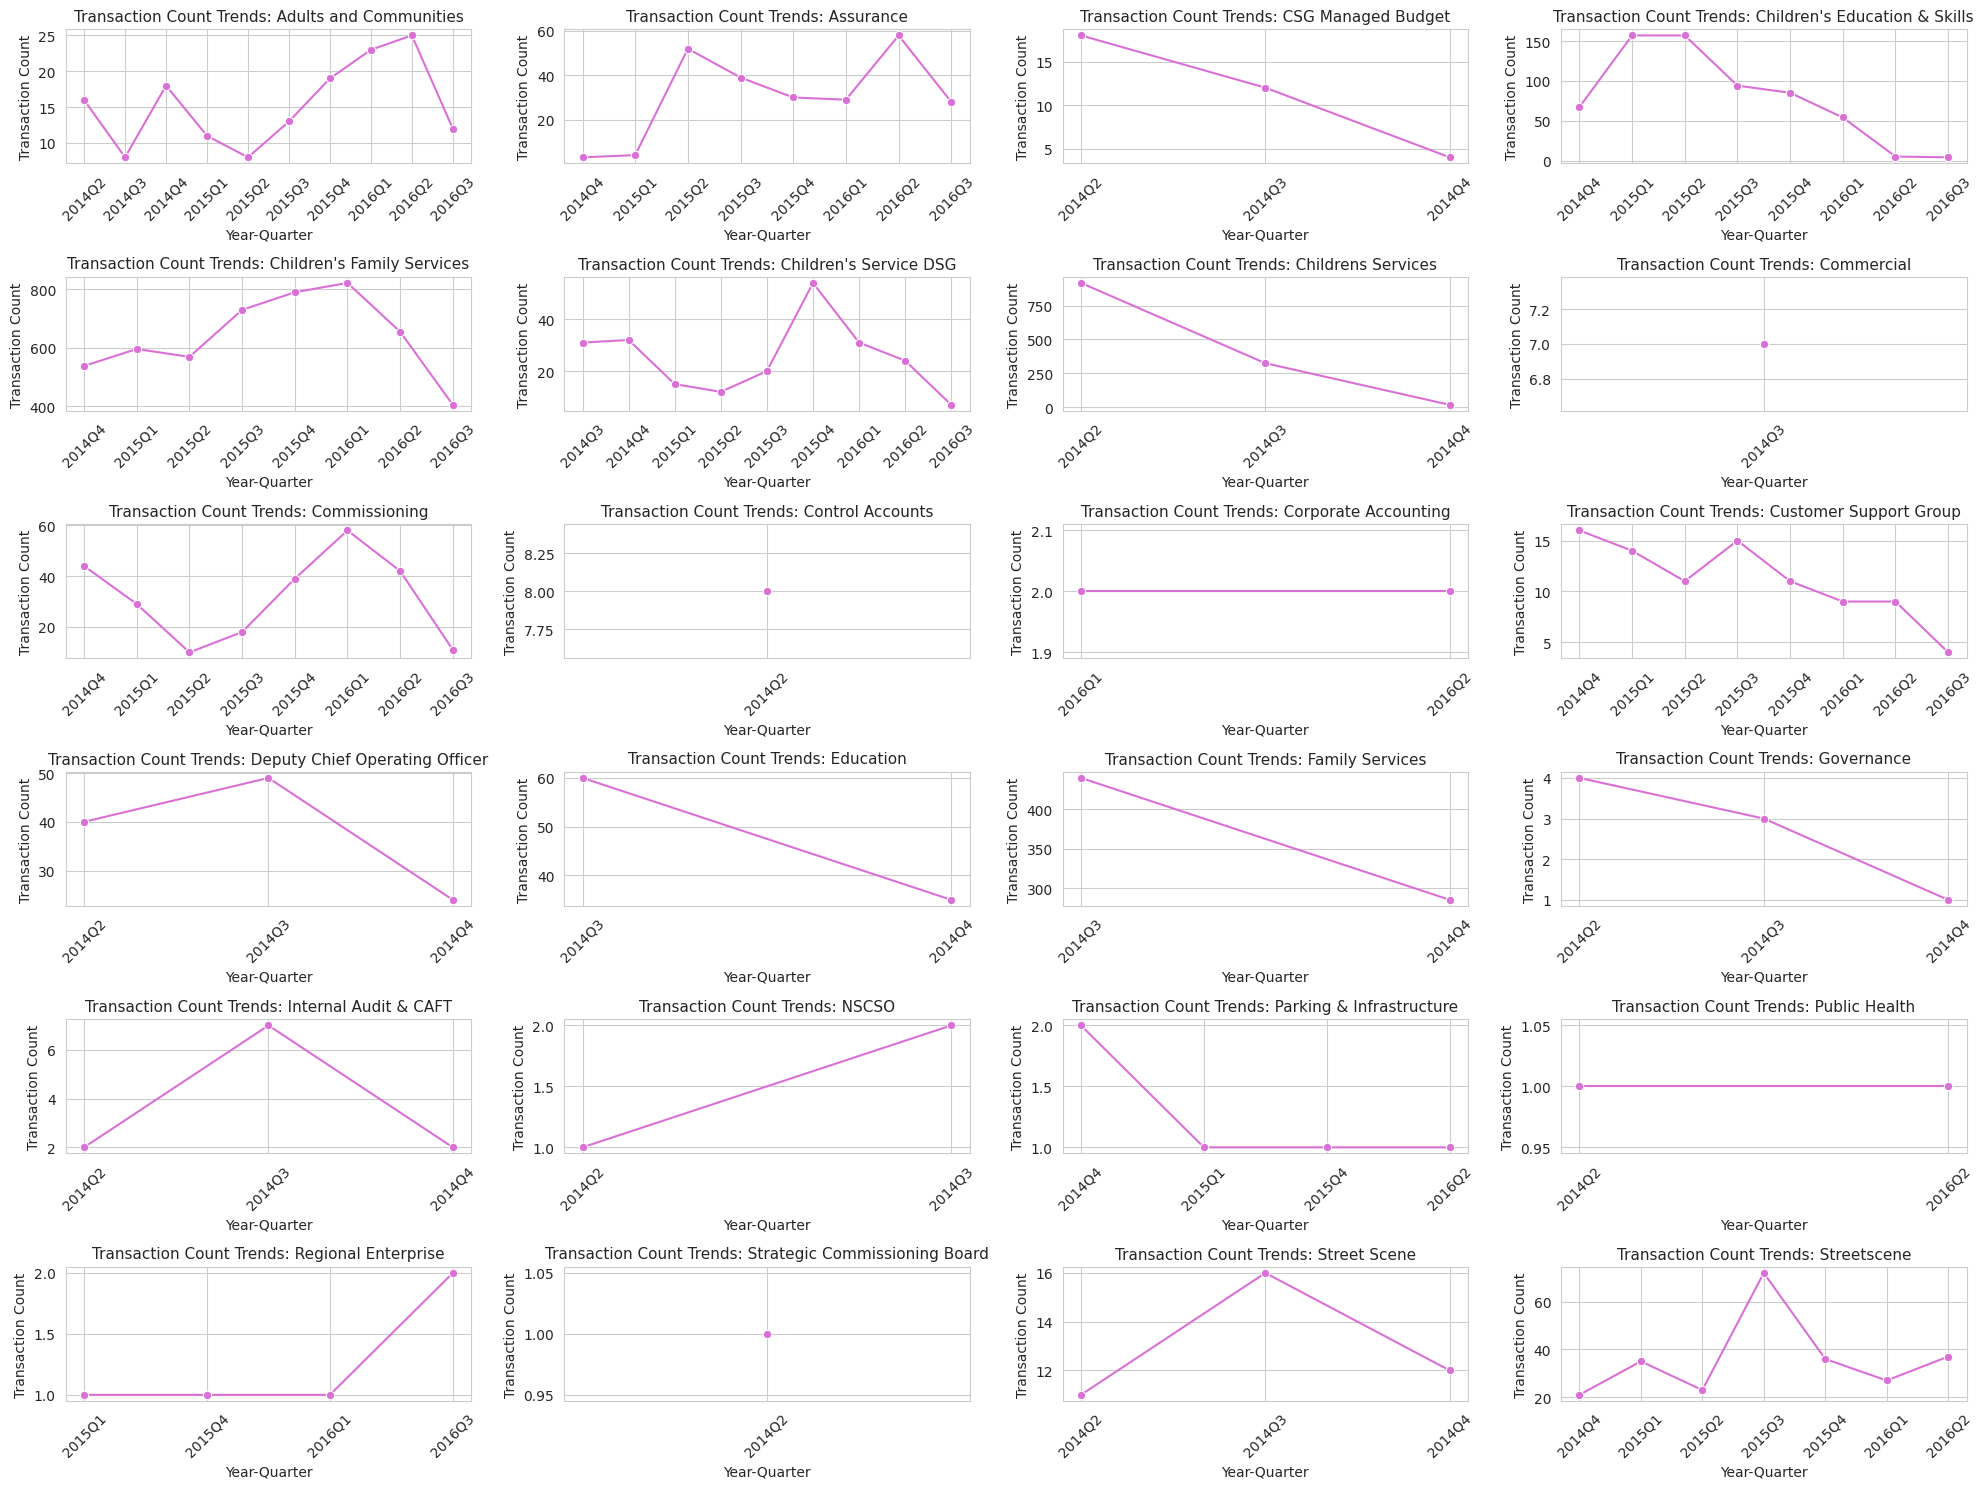

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
# Suppress UserWarnings
warnings.filterwarnings("ignore")
# Get unique service areas
service_areas = summary_df['Service Area'].unique()
# Create subplots
fig, axes = plt.subplots(6, 4, figsize=(20, 15))
axes = axes.flatten()
# Loop through each service area and plot
for i, service_area in enumerate(service_areas):
    service_area_data = summary_df[summary_df['Service Area'] == service_area]
    sns.lineplot(ax=axes[i], x='Quarter_str', y='transaction_count', data=service_area_data, marker="o", color='orchid')
    # Safely rotate x-axis labels
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].set_xlabel('Year-Quarter', fontsize=10)
    axes[i].set_ylabel('Transaction Count', fontsize=10)
    axes[i].set_title(f'Transaction Count Trends: {service_area}', fontsize=11)
# Hide extra empty plots if any
for j in range(len(service_areas), len(axes)):
    fig.delaxes(axes[j])
# Improve layout and save
plt.tight_layout()
plt.savefig('Transaction_Count_Trends.png', dpi=300, bbox_inches='tight')
plt.show()


## 🧠 5. Clustering Suspicious Transactions

We apply unsupervised learning to group transactions that deviate from the norm and might warrant auditing attention.
starting machine learning

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
service_area_stats = df.groupby('Service Area').agg(
    transaction_count=('Total', 'count'),
    average_jv_value=('Total', 'mean'),
    median_jv_value=('Total', 'median'),
    total_jv_value=('Total', 'sum')
).reset_index()
# Display the result
print(service_area_stats)

                      Service Area  transaction_count  average_jv_value  \
0           Adults and Communities                153        154.600588   
1                        Assurance                243         76.779177   
2               CSG Managed Budget                 34       2088.306765   
3    Children's Education & Skills                623         98.204543   
4       Children's Family Services               5105         69.359722   
5           Children's Service DSG                226        129.537257   
6               Childrens Services               1260         73.090294   
7                       Commercial                  7        391.864286   
8                    Commissioning                251        166.462869   
9                 Control Accounts                  8         23.838750   
10            Corporate Accounting                  4        132.982500   
11          Customer Support Group                 89       1720.135506   
12  Deputy Chief Operatin

In [ ]:
service_area_stats.head()

,Service Area,transaction_count,average_jv_value,median_jv_value,total_jv_value
0,Adults and Communities,153,154.600588,105.00,23653.89
1,Assurance,243,76.779177,12.52,18657.34
2,CSG Managed Budget,34,2088.306765,729.00,71002.43
3,Children's Education & Skills,623,98.204543,19.17,61181.43
4,Children's Family Services,5105,69.359722,25.30,354081.38


In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

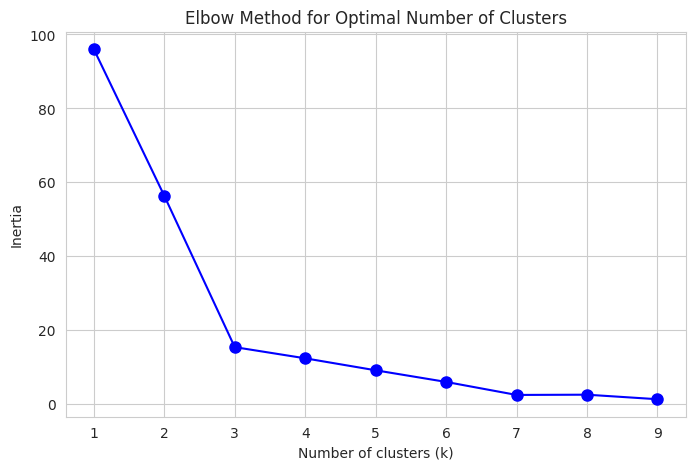

In [ ]:
df = pd.DataFrame(service_area_stats)
# Selecting columns for similarity measurement
features = ['transaction_count', 'average_jv_value', 'median_jv_value', 'total_jv_value']
# Normalizing the data
scaler = StandardScaler()
normalized_data = scaler.fit_transform(df[features])
# Elbow method to determine optimal number of clusters
inertia = []
K = range(1, 10)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_data)
    inertia.append(kmeans.inertia_)
# Plotting the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(K, inertia, 'bo-', markersize=8)
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


                      Service Area  Cluster
0           Adults and Communities        0
1                        Assurance        0
2               CSG Managed Budget        1
3    Children's Education & Skills        0
4       Children's Family Services        2
5           Children's Service DSG        0
6               Childrens Services        0
7                       Commercial        0
8                    Commissioning        0
9                 Control Accounts        0
10            Corporate Accounting        0
11          Customer Support Group        1
12  Deputy Chief Operating Officer        0
13                       Education        0
14                 Family Services        0
15                      Governance        1
16           Internal Audit & CAFT        0
17                           NSCSO        0
18        Parking & Infrastructure        0
19                   Public Health        0
20             Regional Enterprise        0
21   Strategic Commissioning Boa

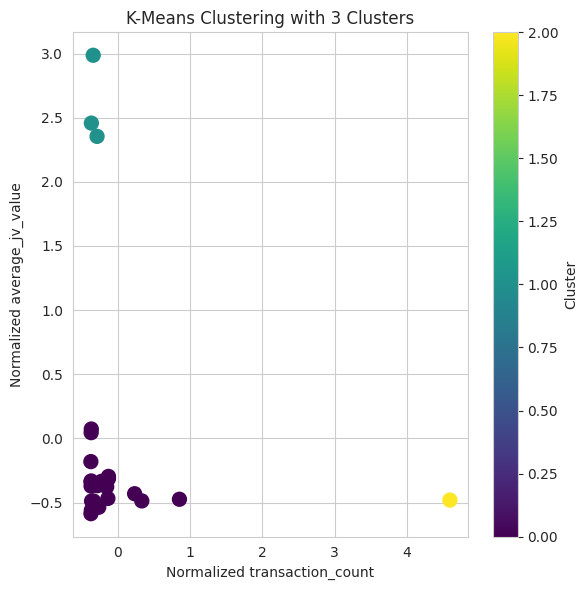

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming normalized_data is 2D
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(normalized_data)
# Output clusters
print(df[['Service Area', 'Cluster']])

# Plotting
plt.figure(figsize=(6, 6))
plt.scatter(normalized_data[:, 0], normalized_data[:, 1], c=df['Cluster'], cmap='viridis', s=100)
plt.title(f'K-Means Clustering with {optimal_k} Clusters')
plt.xlabel('Normalized transaction_count')
plt.ylabel('Normalized average_jv_value')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.tight_layout()
plt.show()

# Output clusters
#print(df[['Service Area', 'Cluster']])
